# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

在这个练习中，我们将开发一个具有全连接层的神经网络来执行分类，并在CIFAR-10数据集上进行测试。

In [3]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. 

The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. 

Below, we initialize toy data and a toy model that we will use to develop your implementation.

我们将使用文件`cs231n/classifiers/neural_net.py`中的类`TwoLayerNet`来表示我们的网络实例。

网络参数存储在实例变量`self.params`中。其中键是字符串参数名，值是numpy数组。

下面，我们初始化玩具数据和一个玩具模型，我们将使用它来开发您的实现。

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
# 创建一个小网络和一些玩具数据来检查你的实现。
# 注意，我们为可重复的实验设置了随机种子。
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. 

This function is very similar to the loss functions you have written for the SVM and Softmax exercises: 

It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

打开文件`cs231n/classifiers/neural_net.py`看看`TwoLayerNet.loss`方法。

这个函数与您为SVM和Softmax练习编写的损失函数非常相似:

它获取数据和权重，并计算类分数、损失和参数上的梯度。

实现前向传球的第一部分，它使用权重和偏差来计算所有输入的分数。

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

在同一个函数中，实现了计算数据和正则化损失的第二部分。

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. 

This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. 

Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

实现函数的其余部分。

这将计算出损失对变量`W1`, `b1`, `W2`, and `b2`的梯度。

现在你(希望!)有一个正确实现的前向通过，你可以调试你的后向通过使用一个数字梯度检查:

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
# 使用数值渐变检查来检查后向遍历的实现。
# 如果您的实现是正确的，那么对于W1、W2、b1和b2，数值梯度和解析梯度之间的差异应该小于1e-8。
loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. 

Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. 

This should be very similar to the training procedure you used for the SVM and Softmax classifiers. 

You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

为了训练网络，我们将使用随机梯度下降法(SGD)，类似于SVM和Softmax分类器。

看看`TwoLayerNet.train`函数，并填写缺失的部分，以实现训练程序。

这应该与SVM和Softmax分类器的训练过程非常相似。

您还必须实现`TwoLayerNet.predict`，因为在网络训练的过程中，训练过程会周期性地进行预测，以跟踪一段时间内的准确性。


Once you have implemented the method, run the code below to train a two-layer network on toy data. 

You should achieve a training loss less than 0.02.

一旦你实现了这个方法，运行下面的代码在玩具数据上训练一个两层网络。

你的训练损失应该少于0.02。

Final training loss:  0.01714364353292376


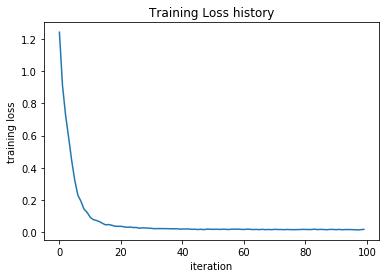

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

现在您已经实现了一个两层的网络，它可以通过渐变检查并处理玩具数据，现在是时候加载我们最喜欢的CIFAR-10数据了，这样我们就可以使用它来训练真实数据集上的分类器。

In [10]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    从磁盘加载CIFAR-10数据集并执行预处理，为两层神经网络分类器做好准备。
    这些步骤与我们在SVM中使用的步骤相同，但是被压缩为一个函数。
    """
    # Load the raw CIFAR-10 data
#     cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    cifar10_dir = 'E:\cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. 

In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; 

after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

为了训练我们的网络，我们将使用SGD。

此外，随着优化的进行，我们将采用指数学习速率计划来调整学习速率;

在每个epoch之后，我们将通过将其乘以衰减率来降低学习率。

In [11]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. 

In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

使用上面提供的默认参数，验证集的验证精度应该在0.29左右。这不是很好。

了解问题所在的一种策略是，在优化过程中绘制损失函数和训练集和验证集的准确性。

另一种策略是将在网络的第一层学到的权重可视化。

在大多数以视觉数据为训练对象的神经网络中，第一层的权值在可视化时通常会显示一些可见的结构。

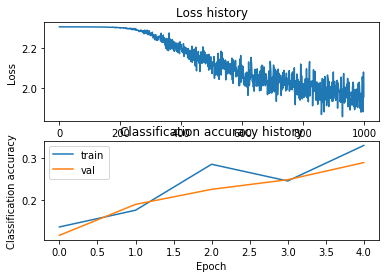

In [12]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

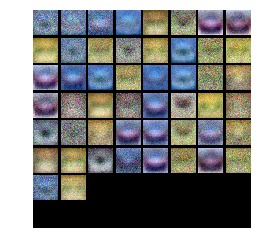

In [13]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. 

Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. 

Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. 

On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**怎么了?**

看看上面的可视化，我们可以看到损失或多或少是线性减少的，这似乎表明**学习率**可能太低了。

此外，训练的准确性和验证的准确性之间没有差距，这说明我们使用的**模型容量**较低，我们应该增加模型的大小。

另一方面，对于一个非常大的模型，我们期望看到更多的**过拟合**，这将表现为训练和验证准确性之间的一个非常大的差距。


**Tuning**. 

Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. 

Below, you should experiment with different values of the various hyperparameters, including **hidden layer size**, **learning rate**, **numer of training epochs**, and **regularization strength**. 

You might also consider tuning **the learning rate decay**, but you should be able to get good performance using the default value.

**调优**

调整超参数并开发它们如何影响最终性能的直觉是使用神经网络的一个重要部分，因此我们希望您进行大量实践。

下面，您应该试验各种超参数的不同值，包括**隐层大小**、**学习率**、**训练周期数**和**正则化强度**。

您也可以考虑调优**学习速率衰减**，但是您应该能够使用默认值获得良好的性能。


**Approximate results**. 

You should be aim to achieve a classification accuracy of greater than 48% on **the validation set**. 

Our best network gets over 52% on **the validation set**.

**近似的结果**

您的目标应该是在验证集上获得超过48%的分类准确率。

我们最好的网络在验证集上获得超过52%的准确率。


**Experiment**: 

You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. 

Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**实验**:

在这个练习中，您的目标是使用一个全连接的神经网络，在CIFAR-10上获得尽可能好的结果(52%可以作为参考)。

您可以自由地实现自己的技术(例如，使用PCA来降低维度，或添加dropout，或向求解器添加特性，等等)。

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [15]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# 使用验证集调整超参数。
# 将您的最佳训练模型存储在best_net中。
# 为了帮助调试你的网络，使用类似于我们上面所使用的可视化可能会有所帮助;
# 这些可视化将与我们在上面看到的那些不太协调的网络在质量上有显著的不同。
# 手工调整超参数可能很有趣，但是您可能会发现编写代码自动扫描可能的超参数组合很有用，
# 就像我们在前面的练习中所做的那样。
pass

results = {}
best_val_acc = 0
best_net = None
# 原来的超参数
# hidden layer size# hidden_size = 50  太小
# learning rate# learning_rate=1e-4 太小
# numer of training epochs# num_iters=1000
# regularization strength# reg=0.25
# learning_rate_decay=0.95
hidden_size = [75, 100, 125]
learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
regularization_strengths = [0.75, 1, 1.25]

print('running')
for hs in hidden_size:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print('.')
            net = TwoLayerNet(input_size, hs, num_classes)
            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1500, batch_size=200,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg= reg, verbose=False)
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net         
            results[(hs,lr,reg)] = val_acc
print()
print("finshed")
# Print out results.
for hs,lr,reg in sorted(results):
    val_acc = results[(hs, lr, reg)]
    print('hidden size %d learning rates %e regularization strengths %e validation accuracy: %f' 
          % (hs, lr, reg,  val_acc))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val_acc)



'''
import random
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
workers=2
input_size = 32 * 32 * 3
num_classes = 10
best_accuracy=0
for worki in range(0,workers):
    hidden_size=random.randint(110,130)
    learning_ratei = 10 ** np.random.uniform(-5,-3)
    #0.0000992918
    numer_of_training_epochs =random.randint(500,2000)
    reg =0.25

    net = TwoLayerNet(input_size, hidden_size, num_classes)
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=numer_of_training_epochs, batch_size=200,
                learning_rate=learning_ratei, learning_rate_decay=0.95,
                reg=reg, verbose=True)
    
    val_acc = (net.predict(X_val) == y_val).mean()
    print("hidden_size:%d ,learning_rate:%.10lf ,numer_of_training_epochs:%d ,reg:%.10lf\n val_acc:%.10lf\n"
          %(hidden_size,learning_ratei,numer_of_training_epochs,reg,val_acc))
    
    if val_acc>best_accuracy:
        best_accuracy=val_acc
        best_net=net
print("Best accuracy is: %.10lf\n"%best_accuracy)
'''
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


running
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

finshed
hidden size 75 learning rates 7.000000e-04 regularization strengths 7.500000e-01 validation accuracy: 0.469000
hidden size 75 learning rates 7.000000e-04 regularization strengths 1.000000e+00 validation accuracy: 0.485000
hidden size 75 learning rates 7.000000e-04 regularization strengths 1.250000e+00 validation accuracy: 0.468000
hidden size 75 learning rates 8.000000e-04 regularization strengths 7.500000e-01 validation accuracy: 0.485000
hidden size 75 learning rates 8.000000e-04 regularization strengths 1.000000e+00 validation accuracy: 0.484000
hidden size 75 learning rates 8.000000e-04 regularization strengths 1.250000e+00 validation accuracy: 0.465000
hidden size 75 learning rates 9.000000e-04 regularization strengths 7.500000e-01 validation accuracy: 0.482000
hidden size 75 learning rates 9.000000e-04 regularization strengths 1.000000e+00 validation accuracy: 0.485000
hidde

'\nimport random\nX_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()\nworkers=2\ninput_size = 32 * 32 * 3\nnum_classes = 10\nbest_accuracy=0\nfor worki in range(0,workers):\n    hidden_size=random.randint(110,130)\n    learning_ratei = 10 ** np.random.uniform(-5,-3)\n    #0.0000992918\n    numer_of_training_epochs =random.randint(500,2000)\n    reg =0.25\n\n    net = TwoLayerNet(input_size, hidden_size, num_classes)\n    # Train the network\n    stats = net.train(X_train, y_train, X_val, y_val,\n                num_iters=numer_of_training_epochs, batch_size=200,\n                learning_rate=learning_ratei, learning_rate_decay=0.95,\n                reg=reg, verbose=True)\n    \n    val_acc = (net.predict(X_val) == y_val).mean()\n    print("hidden_size:%d ,learning_rate:%.10lf ,numer_of_training_epochs:%d ,reg:%.10lf\n val_acc:%.10lf\n"\n          %(hidden_size,learning_ratei,numer_of_training_epochs,reg,val_acc))\n    \n    if val_acc>best_accuracy:\n        best_acc

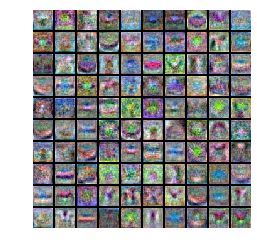

In [16]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; 

you should get above 48%.

当你完成实验时，你应该在测试集上评估你最终的训练网络;你应该得到48%以上。

In [17]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.502


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. 

In what ways can we decrease this gap? Select all that apply.

现在您已经训练了一个神经网络分类器，您可能会发现您的测试精度远远低于训练精度。

我们可以用什么方法来缩小这种差距?选择所有应用。

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.


1. 在更大的数据集上进行训练。
2. 添加更多隐藏单元。
3. 增加正则化强度。
4. 以上皆非。

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$



In [2]:
# print('1')
# print()
# print('1')

1

1
